In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("diabetes_prediction_dataset.csv")
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [3]:
df = pd.get_dummies(df, columns=['gender','smoking_history'])
df.dropna(inplace=True)
df

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Female,gender_Male,gender_Other,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,80.0,0,1,25.19,6.6,140,0,1,0,0,0,0,0,0,1,0
1,54.0,0,0,27.32,6.6,80,0,1,0,0,1,0,0,0,0,0
2,28.0,0,0,27.32,5.7,158,0,0,1,0,0,0,0,0,1,0
3,36.0,0,0,23.45,5.0,155,0,1,0,0,0,1,0,0,0,0
4,76.0,1,1,20.14,4.8,155,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,80.0,0,0,27.32,6.2,90,0,1,0,0,1,0,0,0,0,0
99996,2.0,0,0,17.37,6.5,100,0,1,0,0,1,0,0,0,0,0
99997,66.0,0,0,27.83,5.7,155,0,0,1,0,0,0,0,1,0,0
99998,24.0,0,0,35.42,4.0,100,0,1,0,0,0,0,0,0,1,0


In [4]:
X = df.values

X = StandardScaler().fit_transform(X)
X

array([[ 1.69270354, -0.28443945,  4.93637859, ..., -0.32119822,
         1.35992968, -0.26251249],
       [ 0.53800643, -0.28443945, -0.20257766, ..., -0.32119822,
        -0.73533214, -0.26251249],
       [-0.61669069, -0.28443945, -0.20257766, ..., -0.32119822,
         1.35992968, -0.26251249],
       ...,
       [ 1.07094356, -0.28443945, -0.20257766, ...,  3.11334224,
        -0.73533214, -0.26251249],
       [-0.7943364 , -0.28443945, -0.20257766, ..., -0.32119822,
         1.35992968, -0.26251249],
       [ 0.67124071, -0.28443945, -0.20257766, ..., -0.32119822,
        -0.73533214, -0.26251249]])

In [5]:
pca = PCA(n_components=2)
pca.fit(X)
xpca = pca.transform(X)
xpca

array([[ 2.16525098, -1.09239146],
       [-0.89796754, -0.84801198],
       [ 0.04808331,  1.10639949],
       ...,
       [ 1.20499519,  1.79414879],
       [-0.50448631, -1.78939486],
       [-0.07704727, -1.01028424]])

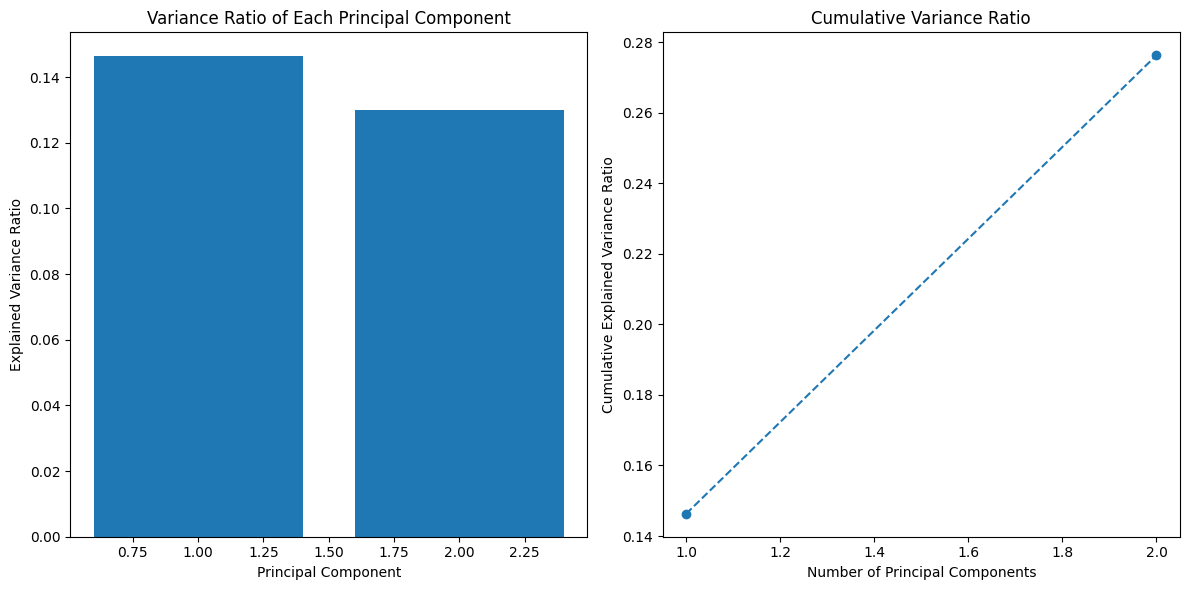

In [6]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Variance Ratio of Each Principal Component')

plt.subplot(1, 2, 2)
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Variance Ratio')

plt.tight_layout()
plt.show()

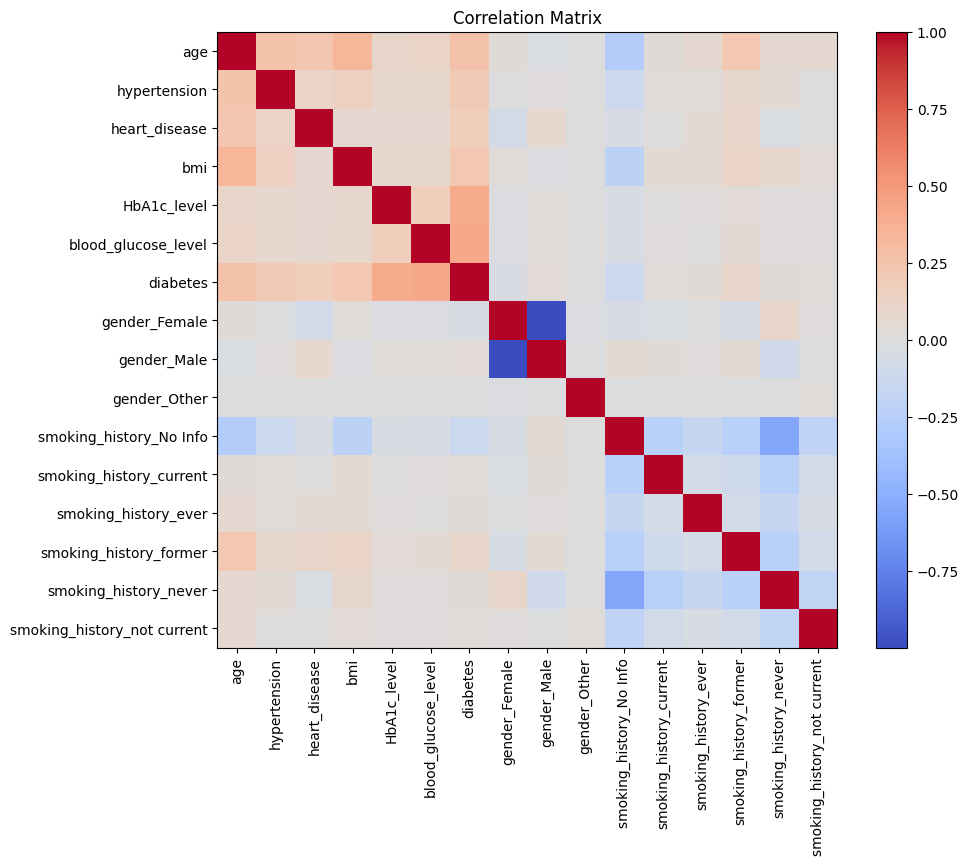

In [7]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none', aspect='auto')
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation='vertical')
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title('Correlation Matrix')
plt.show()

Text(0, 0.5, 'Second Principal Component')

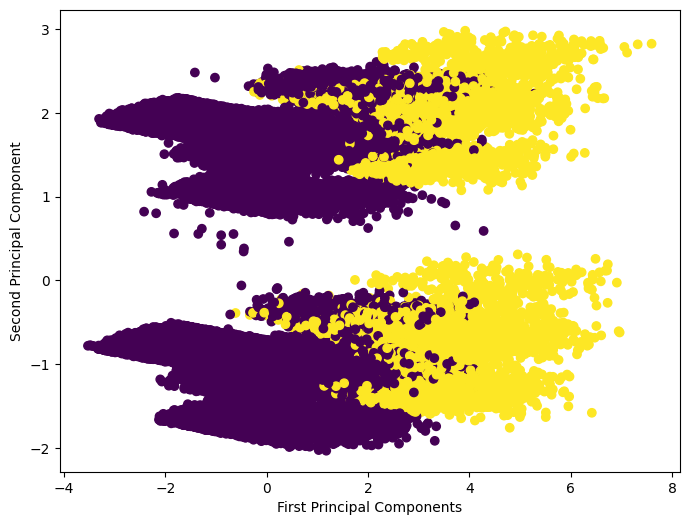

In [8]:
plt.figure(figsize=(8,6))
plt.scatter(xpca[:,0],xpca[:,1],c=df['diabetes'])
plt.xlabel('First Principal Components')
plt.ylabel('Second Principal Component')

In [9]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

X = df.drop('diabetes', axis=1) 
y = df['diabetes'] 

encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [11]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=1) 
X_lda = lda.fit_transform(X_scaled, y_encoded)

print(X_lda[:5])


[[ 1.7597448 ]
 [-0.40908289]
 [ 0.29321343]
 [-0.32742085]
 [ 1.5332537 ]]


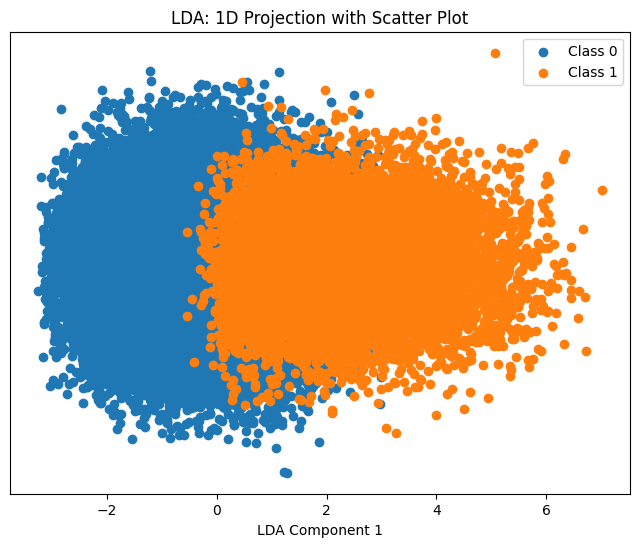

In [12]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8, 6))
for class_value in np.unique(y_encoded):
    plt.scatter(X_lda[y_encoded == class_value], np.random.normal(loc=0.0, scale=0.1, size=sum(y_encoded == class_value)), label=f'Class {class_value}')

plt.title('LDA: 1D Projection with Scatter Plot')
plt.xlabel('LDA Component 1')
plt.yticks([]) 
plt.legend()
plt.show()
